In [ ]:
from google.colab import files
files.upload()  # Chọn file kaggle.json bạn vừa tải về

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"huuduc04","key":"82442755a09417a2e34d5ee34678e5e0"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d huuduc04/dataset

Dataset URL: https://www.kaggle.com/datasets/huuduc04/dataset
License(s): unknown
 99% 1.90G/1.92G [00:11<00:00, 184MB/s]
100% 1.92G/1.92G [00:11<00:00, 179MB/s]


In [ ]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/002_S_4262/MPRAGE/2012-04-19_14_40_14.0/I299155/002_S_4262_2012-04-19_I299155_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/002_S_4270/MPRAGE/2012-11-14_15_22_14.0/I346803/002_S_4270_2012-11-14_I346803_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/006_S_4192/MPRAGE/2012-10-15_11_17_05.0/I340023/006_S_4192_2012-10-15_I340023_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/006_S_4192/MPRAGE/2013-10-03_13_23_17.0/I393211/006_S_4192_2013-10-03_I393211_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/009_S_4530/MPRAGE/2012-09-05_10_17_58.0/I330576/009_S_4530_2012-09-05_I330576_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/010_S_0067/MPRAGE/2006-08-14_10_42_47.0/I20472/010_S_0067_2006-08-14_I20472_MPRAGE_bet_norm.nii  
  inflating: dataset/c1_data/DHCN_C1_C2/ADNI/011_S_0005/MPRAGE/2006-03-09_12_02_37.0/I11739/011_S_0005_2006-03

In [ ]:
import os

def list_loaded_mri_files(mri_root_dir, max_files=20):
    nii_files = []
    for root, _, files in os.walk(mri_root_dir):
        for file in files:
            if file.endswith(".nii") or file.endswith(".nii.gz"):
                full_path = os.path.join(root, file)
                nii_files.append(full_path)
                if len(nii_files) >= max_files:
                    break
        if len(nii_files) >= max_files:
            break

    print(f"Đã tìm thấy {len(nii_files)} file MRI đầu tiên trong thư mục:")
    for path in nii_files:
        print("•", path)

    if len(nii_files) == 0:
        print("Không tìm thấy file MRI nào trong thư mục.")

list_loaded_mri_files("dataset/c1_data")


Đã tìm thấy 20 file MRI đầu tiên trong thư mục:
• dataset/c1_data/DHCN_C1_C2/ADNI/031_S_4203/MPRAGE/2012-09-26_14_01_53.0/I348202/031_S_4203_2012-09-26_I348202_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/130_S_4415/MPRAGE/2012-08-01_13_43_36.0/I374159/130_S_4415_2012-08-01_I374159_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/141_S_0853/MPRAGE/2007-09-16_12_24_11.0/I73317/141_S_0853_2007-09-16_I73317_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/153_S_2148/MPRAGE/2011-05-26_11_10_16.0/I237627/153_S_2148_2011-05-26_I237627_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/036_S_1135/MPRAGE/2009-01-16_11_50_33.0/I137683/036_S_1135_2009-01-16_I137683_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/027_S_1081/MPRAGE/2009-02-04_11_44_02.0/I135176/027_S_1081_2009-02-04_I135176_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADNI/035_S_0156/MPRAGE/2006-09-07_14_24_36.0/I23950/035_S_0156_2006-09-07_I23950_MPRAGE_bet_norm.nii
• dataset/c1_data/DHCN_C1_C2/ADN

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

def show_mri_slices(nii_path):
    img = nib.load(nii_path).get_fdata()

    depth = img.shape[0]
    mid_slice = depth // 2

    plt.figure(figsize=(12, 4))

    for i, offset in enumerate([-10, 0, 10]):
        slice_idx = mid_slice + offset
        slice_img = img[slice_idx, :, :]
        plt.subplot(1, 3, i+1)
        plt.imshow(slice_img.T, cmap='gray', origin='lower')
        plt.title(f"Lát cắt D={slice_idx}")
        plt.axis('off')

    plt.suptitle("MRI Slices (Axial)")
    plt.tight_layout()
    plt.show()

<ipython-input-7-3eddb255a5c8>:24: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


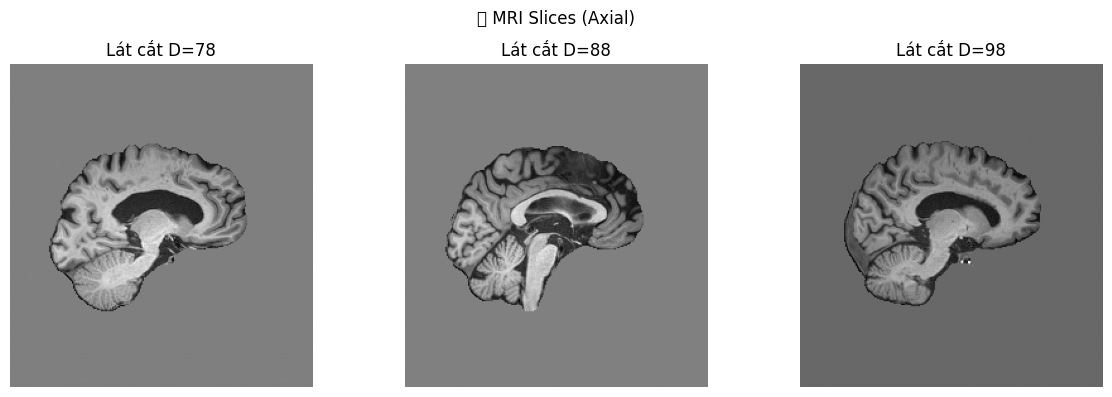

In [ ]:
nii_path = "dataset/c1_data/DHCN_C1_C21/ADNI/137_S_4303/MPRAGE/2012-11-08_09_33_39.0/I345461/137_S_4303_2012-11-08_I345461_MPRAGE_bet_norm.nii"
show_mri_slices(nii_path)

In [ ]:
import os
import pandas as pd
import nibabel as nib
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import scipy.ndimage

class ADStagePredictor(nn.Module):
    def __init__(self, demographic_dim=5, hidden_size=64, num_classes=4):
        super(ADStagePredictor, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv3d(1, 16, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool3d((1, 2, 2)),
            nn.Dropout3d(0.3),
            nn.Conv3d(16, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool3d((1, 2, 2)),
            nn.Dropout3d(0.3)
        )

        self.cnn_feature_dim = self._get_cnn_feature_dim((1, 128, 128, 128))

        self.lstm = nn.LSTM(input_size=self.cnn_feature_dim + demographic_dim,
                            hidden_size=64,
                            batch_first=True,
                            bidirectional=True)
        self.fc = nn.Linear(64 * 2, num_classes)
        self.softmax = nn.Softmax(dim=-1)

    def _get_cnn_feature_dim(self, input_shape):
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            out = self.cnn(dummy_input)
            out = out.mean(dim=2).flatten(1)
            return out.shape[1]

    def forward(self, mri, demo_seq):
        x = self.cnn(mri)
        x = x.mean(dim=2).flatten(1)
        x = x.unsqueeze(1).repeat(1, 2, 1)
        x = torch.cat([x, demo_seq], dim=-1)
        out, _ = self.lstm(x)
        logits = self.fc(out)
        return self.softmax(logits)

class MRIDemographicDataset(Dataset):
    def __init__(self, csv_df, mri_dir, transform=None):
        self.csv = csv_df
        self.mri_dir = mri_dir
        self.transform = transform
        self.missing_ids = set()
        self.samples = self._create_samples()

    def _create_samples(self):
        samples = []
        grouped = self.csv.groupby('PTID')
        for ptid, group in grouped:
            baseline = group[group['is_baseline'] == True]
            if baseline.empty:
                print(f"Bỏ PTID={ptid}: không có baseline")
                continue

            base_row = baseline.iloc[0]
            base_img_path = self._find_mri_path(base_row['image_id'])
            if base_img_path is None:
                print(f"Bỏ PTID={ptid}: không tìm thấy ảnh MRI cho image_id={base_row['image_id']}")
                continue

            follow_ups = group[group['visit_months'].isin([6, 12])]
            if follow_ups.shape[0] != 2:
                print(f"Bỏ PTID={ptid}: không có đủ visit 6 và 12 tháng")
                continue

            demo_data = follow_ups[['AgeAtVisit', 'MMSE', 'CDGLOBAL', 'PTEDUCAT', 'PTGENDER_mapped']]
            if demo_data.isnull().any().any():
                print(f"Bỏ PTID={ptid}: thiếu dữ liệu nhân khẩu học (có NaN)")
                continue

            follow_ups = follow_ups.sort_values('visit_months')
            demo_seq = demo_data.values
            label_seq = follow_ups['DIAGNOSIS'].astype(int).values - 1

            samples.append((base_img_path, demo_seq, label_seq))
        print(f"\n Tổng số mẫu hợp lệ: {len(samples)}")
        return samples

    def _find_mri_path(self, image_id):
        image_id_str = f"I{int(image_id)}"
        for root, _, files in os.walk(self.mri_dir):
            for file in files:
                if file.endswith("_MPRAGE_bet_norm.nii") and image_id_str in file:
                    return os.path.join(root, file)
        self.missing_ids.add(image_id)
        return None

    def _resize_volume(self, img, target_shape=(128, 128, 128)):
        factors = [t / s for t, s in zip(target_shape, img.shape)]
        return scipy.ndimage.zoom(img, zoom=factors, order=1)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, demo_seq, label_seq = self.samples[idx]
        img = nib.load(img_path).get_fdata()
        img = self._resize_volume(img, target_shape=(128, 128, 128))
        img = (img - np.mean(img)) / np.std(img)
        img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0)
        demo_tensor = torch.tensor(demo_seq, dtype=torch.float32)
        label_tensor = torch.tensor(label_seq, dtype=torch.long)
        return img_tensor, demo_tensor, label_tensor

In [ ]:
# Load CSV
csv_path = "cs_with_dg.csv"
# MRI folder
mri_dir = "dataset/c1_data"

In [ ]:
csv_df = pd.read_csv(csv_path)
csv_df

,Unnamed: 0,PTID,EXAMDATE,DIAGNOSIS,image_id,mri_date,ADAS11,ADAS13,MMSE,CDGLOBAL,...,PTDOBYY,PTEDUCAT,PTGENDER_mapped,AgeAtVisit,is_baseline,Baseline_AgeAtVisit,Baseline_MMSE,Baseline_CDGLOBAL,Baseline_PTEDUCAT,Baseline_DIAGNOSIS
0,0,002_S_0295,2011-06-02,1.0,238627,2011-06-02,6.00,9.00,28.0,0.0,...,1921.0,18.0,0,90.0,True,90.0,28.0,0.0,18.0,1.0
1,1,002_S_0295,2012-05-10,1.0,303066,2012-05-10,7.00,9.00,22.0,0.0,...,1921.0,18.0,0,91.0,False,90.0,28.0,0.0,18.0,1.0
2,2,002_S_0559,2006-12-27,1.0,32917,2006-12-12,6.00,11.00,29.0,0.0,...,1927.0,16.0,0,79.0,True,79.0,29.0,0.0,16.0,1.0
3,3,002_S_0559,2006-12-27,1.0,32918,2006-12-12,6.00,11.00,29.0,0.0,...,1927.0,16.0,0,79.0,True,79.0,29.0,0.0,16.0,1.0
4,4,002_S_0559,2007-07-20,1.0,78364,2007-10-18,4.67,7.67,29.0,0.0,...,1927.0,16.0,0,80.0,False,79.0,29.0,0.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,1830,941_S_4292,2016-07-19,1.0,763574,2016-07-22,5.00,7.00,29.0,0.5,...,1940.0,15.0,0,76.0,False,72.0,27.0,0.0,15.0,1.0
1812,1831,941_S_4764,2013-06-27,2.0,376064,2013-06-10,4.00,7.00,30.0,0.5,...,1929.0,20.0,1,84.0,True,84.0,30.0,0.5,20.0,2.0
1813,1832,941_S_4764,2014-07-03,2.0,431036,2014-06-16,5.00,7.00,30.0,0.5,...,1929.0,20.0,1,85.0,False,84.0,30.0,0.5,20.0,2.0
1814,1833,941_S_5124,2014-04-25,1.0,420755,2014-04-21,7.00,10.00,26.0,0.5,...,1936.0,20.0,1,78.0,True,78.0,26.0,0.5,20.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

all_ptids = csv_df['PTID'].unique()
train_ptids, val_ptids = train_test_split(all_ptids, test_size=0.2, random_state=42)

train_df = csv_df[csv_df['PTID'].isin(train_ptids)].reset_index(drop=True)
val_df = csv_df[csv_df['PTID'].isin(val_ptids)].reset_index(drop=True)

In [ ]:
train_dataset = MRIDemographicDataset(train_df, mri_dir)
val_dataset = MRIDemographicDataset(val_df, mri_dir)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=4)

Bỏ PTID=002_S_0559: không có đủ visit 6 và 12 tháng
Bỏ PTID=002_S_0816: không tìm thấy ảnh MRI cho image_id=47406
Bỏ PTID=002_S_0954: không tìm thấy ảnh MRI cho image_id=53479
Bỏ PTID=002_S_1070: không tìm thấy ảnh MRI cho image_id=56588
Bỏ PTID=002_S_1261: không tìm thấy ảnh MRI cho image_id=71105
Bỏ PTID=002_S_1268: không tìm thấy ảnh MRI cho image_id=74478
Bỏ PTID=002_S_4270: không tìm thấy ảnh MRI cho image_id=301756
Bỏ PTID=002_S_4521: không tìm thấy ảnh MRI cho image_id=330178
Bỏ PTID=002_S_4799: không tìm thấy ảnh MRI cho image_id=354817
Bỏ PTID=002_S_5018: không tìm thấy ảnh MRI cho image_id=372817
Bỏ PTID=003_S_0907: không tìm thấy ảnh MRI cho image_id=50717
Bỏ PTID=003_S_0981: không tìm thấy ảnh MRI cho image_id=53046
Bỏ PTID=003_S_1074: không tìm thấy ảnh MRI cho image_id=89848
Bỏ PTID=006_S_0731: không tìm thấy ảnh MRI cho image_id=395978
Bỏ PTID=006_S_4713: không tìm thấy ảnh MRI cho image_id=348403
Bỏ PTID=009_S_0751: không tìm thấy ảnh MRI cho image_id=331752
Bỏ PTID=009

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
model = ADStagePredictor()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(10):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for mri, demo_seq, labels in train_loader:
        mri, demo_seq, labels = mri.to(device), demo_seq.to(device), labels.to(device)
        optimizer.zero_grad()

        output = model(mri, demo_seq)

        loss = criterion(output[:, 0], labels[:, 0]) + criterion(output[:, 1], labels[:, 1])
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        preds_6 = output[:, 0].argmax(dim=-1)
        preds_12 = output[:, 1].argmax(dim=-1)
        train_correct += (preds_6 == labels[:, 0]).sum().item() + (preds_12 == labels[:, 1]).sum().item()
        train_total += 2 * labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_acc = train_correct / train_total

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for mri, demo_seq, labels in val_loader:
            mri, demo_seq, labels = mri.to(device), demo_seq.to(device), labels.to(device)
            output = model(mri, demo_seq)
            loss = criterion(output[:, 0], labels[:, 0]) + criterion(output[:, 1], labels[:, 1])
            val_loss += loss.item()

            preds_6 = output[:, 0].argmax(dim=-1)
            preds_12 = output[:, 1].argmax(dim=-1)
            val_correct += (preds_6 == labels[:, 0]).sum().item() + (preds_12 == labels[:, 1]).sum().item()
            val_total += 2 * labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = val_correct / val_total

    print(f"Epoch {epoch+1}: "
          f"Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f} | "
          f"Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

Epoch 1: Train Loss=2.4821, Train Acc=0.5437 | Val Loss=2.4322, Val Acc=0.5645
Epoch 2: Train Loss=2.2897, Train Acc=0.6311 | Val Loss=2.4095, Val Acc=0.5645
Epoch 3: Train Loss=2.2665, Train Acc=0.6311 | Val Loss=2.4024, Val Acc=0.5645
Epoch 4: Train Loss=2.2413, Train Acc=0.6311 | Val Loss=2.4013, Val Acc=0.5645
Epoch 5: Train Loss=2.2550, Train Acc=0.6311 | Val Loss=2.3995, Val Acc=0.5645
Epoch 6: Train Loss=2.2425, Train Acc=0.6311 | Val Loss=2.3983, Val Acc=0.5645
Epoch 7: Train Loss=2.2495, Train Acc=0.6311 | Val Loss=2.3972, Val Acc=0.5645


KeyboardInterrupt: 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(10):
    model.train()
    train_loss, train_correct, train_total = 0, 0, 0

    for mri, demo_seq, labels in train_loader:
        mri, demo_seq, labels = mri.to(device), demo_seq.to(device), labels.to(device)
        optimizer.zero_grad()

        output = model(mri, demo_seq)

        loss = criterion(output[:, 0], labels[:, 0]) + criterion(output[:, 1], labels[:, 1])
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        preds_6 = output[:, 0].argmax(dim=-1)
        preds_12 = output[:, 1].argmax(dim=-1)
        train_correct += (preds_6 == labels[:, 0]).sum().item() + (preds_12 == labels[:, 1]).sum().item()
        train_total += 2 * labels.size(0)

    avg_train_loss = train_loss / len(train_loader)
    train_acc = train_correct / train_total

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for mri, demo_seq, labels in val_loader:
            mri, demo_seq, labels = mri.to(device), demo_seq.to(device), labels.to(device)
            output = model(mri, demo_seq)
            loss = criterion(output[:, 0], labels[:, 0]) + criterion(output[:, 1], labels[:, 1])
            val_loss += loss.item()

            preds_6 = output[:, 0].argmax(dim=-1)
            preds_12 = output[:, 1].argmax(dim=-1)
            val_correct += (preds_6 == labels[:, 0]).sum().item() + (preds_12 == labels[:, 1]).sum().item()
            val_total += 2 * labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_acc = val_correct / val_total

    print(f"Epoch {epoch+1}: "
          f"Train Loss={avg_train_loss:.4f}, Train Acc={train_acc:.4f} | "
          f"Val Loss={avg_val_loss:.4f}, Val Acc={val_acc:.4f}")

Epoch 1: Train Loss=2.5427, Train Acc=0.6214 | Val Loss=2.4470, Val Acc=0.5645
Epoch 2: Train Loss=2.3115, Train Acc=0.6311 | Val Loss=2.4090, Val Acc=0.5645
Epoch 3: Train Loss=2.2688, Train Acc=0.6311 | Val Loss=2.4001, Val Acc=0.5645
Epoch 4: Train Loss=2.2426, Train Acc=0.6311 | Val Loss=2.3989, Val Acc=0.5645
Epoch 5: Train Loss=2.2342, Train Acc=0.6311 | Val Loss=2.3973, Val Acc=0.5645
Epoch 6: Train Loss=2.2300, Train Acc=0.6311 | Val Loss=2.3961, Val Acc=0.5645
Epoch 7: Train Loss=2.2468, Train Acc=0.6311 | Val Loss=2.3958, Val Acc=0.5645
Epoch 8: Train Loss=2.2261, Train Acc=0.6311 | Val Loss=2.3956, Val Acc=0.5645
Epoch 9: Train Loss=2.2259, Train Acc=0.6311 | Val Loss=2.3952, Val Acc=0.5645
Epoch 10: Train Loss=2.2245, Train Acc=0.6311 | Val Loss=2.3950, Val Acc=0.5645


In [ ]:
import os
import pandas as pd

def find_mri_path(image_id, root_dir):
    image_id_str = f"I{int(image_id)}"
    for root, _, files in os.walk(root_dir):
        for f in files:
            if f.endswith("_MPRAGE_bet_norm.nii") and f"_{image_id_str}_" in f:
                return os.path.join(root, f)
    return None

def merge_csv_with_mri(csv_path, mri_root_dir, output_csv):
    df = pd.read_csv(csv_path)
    matched_paths = []
    missing = 0

    for idx, row in df.iterrows():
        img_id = row['image_id']
        path = find_mri_path(img_id, mri_root_dir)
        if path:
            matched_paths.append(path)
        else:
            matched_paths.append(None)
            missing += 1

    df['mri_path'] = matched_paths
    df_valid = df[df['mri_path'].notnull()]
    df_valid.to_csv(output_csv, index=False)

    print(f" CSV gốc có {len(df)} dòng")
    print(f" Số bản ghi không tìm thấy ảnh MRI: {missing}")
    print(f" Số bản ghi hợp lệ: {len(df_valid)}")
    print(f" Đã lưu file: {output_csv}")

merge_csv_with_mri('cs_with_dg.csv', 'dataset', 'merged_data.csv')

 CSV gốc có 1816 dòng
 Số bản ghi không tìm thấy ảnh MRI: 1017
 Số bản ghi hợp lệ: 799
 Đã lưu file: merged_data.csv


In [ ]:
import os
import pandas as pd

def find_mri_path_by_ptid_examdate(ptid, examdate, root_dir):
    ptid_str = ptid.replace(" ", "").strip()
    examdate_str = str(examdate).strip()

    for root, _, files in os.walk(root_dir):
        for f in files:
            if (
                f.endswith("_MPRAGE_bet_norm.nii") and
                ptid_str in root and
                examdate_str in f
            ):
                return os.path.join(root, f)
    return None

def merge_csv_by_ptid_examdate(csv_path, mri_root_dir, output_csv):
    df = pd.read_csv(csv_path)
    matched_paths = []
    missing = 0

    for idx, row in df.iterrows():
        ptid = row['PTID']
        examdate = row['EXAMDATE']
        path = find_mri_path_by_ptid_examdate(ptid, examdate, mri_root_dir)
        if path:
            matched_paths.append(path)
        else:
            matched_paths.append(None)
            missing += 1

    df['mri_path'] = matched_paths
    df_valid = df[df['mri_path'].notnull()]
    df_valid.to_csv(output_csv, index=False)

    print(f"CSV gốc có {len(df)} dòng")
    print(f"Số bản ghi không tìm thấy ảnh MRI: {missing}")
    print(f"Số bản ghi hợp lệ: {len(df_valid)}")
    print(f"Đã lưu file: {output_csv}")

merge_csv_by_ptid_examdate('cs_with_dg.csv', 'dataset', 'merged_by_ptid_date.csv')

CSV gốc có 1816 dòng
Số bản ghi không tìm thấy ảnh MRI: 1573
Số bản ghi hợp lệ: 243
Đã lưu file: merged_by_ptid_date.csv
